<a href="https://colab.research.google.com/github/pratikasarkar/Unsupervised-Learning/blob/master/KMeans_Clustering_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Please UpVote if you like the work!!!***

# **Distance for continous values :** 

1. Euclidean Distance = np.sqrt( (a1-a2)^2 + (b1-b2)^2 )
2. Manhattan distance = np.abs(a1-a2) + np.abs(b1-b2)
3. Cosine Distance = 1 - [ ( (a1xa2)+(b1xb2) ) / ( np.sqrt(a1^2 + b1^2) x np.sqrt(a2^2 + b2^2) ) ]
#### ***Cosine distance = 1 - Cosine_Similarity***
![alt text](https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png)

*Distance based models should involve mandatory scaling of data.*

A general thumbrule for scaling - 

1. Use "StandardScalar/zscore" when majority of our data is continous.
  *  Range of "StandardScalar/zscore" is between **-3 to +3**.
  *  StandardScalar/zscore = (Value - mean_data)/std_data
2. Use "MinMaxScalar" when majority of our data is categorical or there are a 50% continous and 50% categorical variables.
  *  Range of "MinMaxScalar" is between **0 to +1**.
  *  MinMaxScalar = (Value - min_value)/(max_val - min_val)
3. "MaxNormalization" is generally used to scale pixel of image data (Convert from 0-255 grayscale to 0-1 scale)
  *  Range of "MaxNormalization" is between **minimum_value to +1**.
  *  StandardScalar/zscore = Value/max_val


# **Distance feature for Categorical values :**

1. ***Jaccard distance = 1 - Jaccard_Similarity***

Assume we have two vectors A and B. To calculate the Jaccard similarity we use the following formula:

Jaccard similarity = M11 / ( M01 + M10 + M11 )

In other words, the Jaccard similarity coefficient measures the number of attributes where A and B are both 1, divided by the number of attributes where A and B are dissimilar, plus the number of attributes where they are both 1.

**Jaccard distance = 1 - M11 / ( M01 + M10 + M11 )
 = (M01 + M10) / ( M01 + M10 + M11 )**


# **KMeans Clustering**
![alt text](https://jhui.github.io/assets/ml/kmeans.png)

#### Visualization link : https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

K-Means starts by randomly defining k centroids. From there, it works in iterative (repetitive) steps to perform two tasks:

1. Assign each data point to the closest corresponding centroid, using the any of the above distance measure.
2. For each centroid, calculate the mean of the values of all the points belonging to it. The mean value becomes the new value of the centroid.

Once step 2 is complete, all of the centroids have new values that correspond to the means of all of their corresponding points. These new points are put through steps *1* and *2* producing yet another set of centroid values. This process is repeated over and over until there is no change in the centroid values, meaning that they have been accurately grouped. Or, the process can be stopped when a previously determined maximum number of steps has been met.

Now the problem is that, if any other random centroids were selected, the clusters could have been completely different. For this purpose, we pass an argument "n_init" to the algorithm so that it selects different combinations of random values as starting centroid points and gives us the best starting centroid combination depending on the **minimum value of inertia/within-cluster sum-of-squares**.

***INERTIA :*** 

![alt text](https://i.ibb.co/kKctMzj/Capture1.png)

Inertia is calculated by taking the sum of squares of distance of each data point from the centroid value.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ***KMeans Clustering algorithm implementation using euclidean distance***

In [2]:
df = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                   'X1': [3,6,4.5,6.1,8.8,9.1,10,11.8,13],
                   'X2': [5,5.2,6,8,7,7.9,5.8,4.2,5.7]})
df

,ID,X1,X2
0,s1,3.0,5.0
1,s2,6.0,5.2
2,s3,4.5,6.0
3,s4,6.1,8.0
4,s5,8.8,7.0
5,s6,9.1,7.9
6,s7,10.0,5.8
7,s8,11.8,4.2
8,s9,13.0,5.7


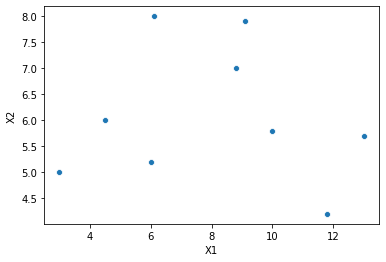

In [3]:
sns.scatterplot(df['X1'],df['X2'])

1. Group1:
 * c1 -> ( 4.5 , 6 )
 * c2 -> ( 8.8 , 7 )
2. Group2:
 * c1 -> ( 6 , 5.2 )
 * c2 -> ( 6.1 , 8 )
3. Group3:
 * c1 -> ( 4.5 , 6 )
 * c2 -> ( 10 , 5.8 )
4. Group4:
 * c1 -> ( 6.1 , 8 )
 * c2 -> ( 6 , 5.2 )
5. Group5:
 * c1 -> ( 8.8 , 7 )
 * c2 -> ( 11.8 , 4.2 )
6. Group6:
 * c1 -> ( 6 , 5.2 )
 * c2 -> ( 11.8 , 4.2 )

In [4]:
c1 = ( 4.5 , 6 )
c2 = ( 8.8 , 7 )
print('Group1')
print('Iteration1')
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c2','c2','c2','c2','c2']})
print('Centroids : ',c1,c2)
print(df_dist)
print()
print('Iteration2')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c2','c2','c2','c2','c2']})
print(df_dist)
print()
print('Iteration3')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
print('As centroid value does not change after Iteration 2, the algorithm stops here...')
Inertia_c1 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'] - c1[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'] - c1[1])**2)))**2)
Inertia_c2 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'] - c2[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'] - c2[1])**2)))**2)
total_inertia = Inertia_c1 + Inertia_c2
print('C1 Inertia : ',Inertia_c1)
print('C2 Inertia : ',Inertia_c2)
print("Total Inertia : ",total_inertia)

Group1
Iteration1
Centroids :  (4.5, 6) (8.8, 7)
   ID   Dist_c1   Dist_c2 cluster
0  s1  1.802776  6.135145      c1
1  s2  1.700000  3.328663      c1
2  s3  0.000000  4.414748      c1
3  s4  2.561250  2.879236      c1
4  s5  4.414748  0.000000      c2
5  s6  4.976947  0.948683      c2
6  s7  5.503635  1.697056      c2
7  s8  7.518643  4.103657      c2
8  s9  8.505292  4.396590      c2

Iteration2
Centroids :  (4.9, 6.05) (10.540000000000001, 6.119999999999999)
   ID   Dist_c1   Dist_c2 cluster
0  s1  2.170829  7.622729      c1
1  s2  1.390144  4.632278      c1
2  s3  0.403113  6.041192      c1
3  s4  2.289651  4.821618      c1
4  s5  4.014038  1.949872      c2
5  s6  4.589390  2.289541      c2
6  s7  5.106124  0.627694      c2
7  s8  7.143704  2.296519      c2
8  s9  8.107558  2.495596      c2

Iteration3
Centroids :  (4.9, 6.05) (10.540000000000001, 6.119999999999999)
As centroid value does not change after Iteration 2, the algorithm stops here...
C1 Inertia :  12.049999999999997
C2 

In [5]:
c1 = ( 6 , 5.2 )
c2 = ( 6.1 , 8 )
print('Group2')
print('Iteration1')
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c2','c2','c2','c1','c1','c1']})
print('Centroids : ',c1,c2)
print(df_dist)
print()
print('Iteration2')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c2','c2','c2','c1','c1','c1']})
print(df_dist)
print()
print('Iteration3')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
print('As centroid value does not change after Iteration 2, the algorithm stops here...')
Inertia_c1 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'] - c1[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'] - c1[1])**2)))**2)
Inertia_c2 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'] - c2[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'] - c2[1])**2)))**2)
total_inertia = Inertia_c1 + Inertia_c2
print('C1 Inertia : ',Inertia_c1)
print('C2 Inertia : ',Inertia_c2)
print("Total Inertia : ",total_inertia)

Group2
Iteration1
Centroids :  (6, 5.2) (6.1, 8)
   ID   Dist_c1   Dist_c2 cluster
0  s1  3.006659  4.313931      c1
1  s2  0.000000  2.801785      c1
2  s3  1.700000  2.561250      c1
3  s4  2.801785  0.000000      c2
4  s5  3.328663  2.879236      c2
5  s6  4.110961  3.001666      c2
6  s7  4.044750  4.477723      c1
7  s8  5.885576  6.850547      c1
8  s9  7.017834  7.273239      c1

Iteration2
Centroids :  (8.049999999999999, 5.316666666666666) (8.0, 7.633333333333333)
   ID   Dist_c1   Dist_c2 cluster
0  s1  5.059919  5.651057      c1
1  s2  2.053317  3.149780      c1
2  s3  3.615169  3.862354      c1
3  s4  3.317044  1.935057      c2
4  s5  1.842854  1.020349      c2
5  s6  2.788568  1.131862      c2
6  s7  2.009007  2.713137      c1
7  s8  3.912729  5.121306      c1
8  s9  4.964821  5.360763      c1

Iteration3
Centroids :  (8.049999999999999, 5.316666666666666) (8.0, 7.633333333333333)
As centroid value does not change after Iteration 2, the algorithm stops here...
C1 Inertia :

In [6]:
c1 = ( 4.5 , 6 )
c2 = ( 10 , 5.8 )
print('Group3')
print('Iteration1')
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c2','c2','c2','c2','c2']})
print('Centroids : ',c1,c2)
print(df_dist)
print()
print('Iteration2')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c2','c2','c2','c2','c2']})
print(df_dist)
print()
print('Iteration3')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
print('As centroid value does not change after Iteration 2, the algorithm stops here...')
Inertia_c1 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'] - c1[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'] - c1[1])**2)))**2)
Inertia_c2 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'] - c2[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'] - c2[1])**2)))**2)
total_inertia = Inertia_c1 + Inertia_c2
print('C1 Inertia : ',Inertia_c1)
print('C2 Inertia : ',Inertia_c2)
print("Total Inertia : ",total_inertia)

Group3
Iteration1
Centroids :  (4.5, 6) (10, 5.8)
   ID   Dist_c1   Dist_c2 cluster
0  s1  1.802776  7.045566      c1
1  s2  1.700000  4.044750      c1
2  s3  0.000000  5.503635      c1
3  s4  2.561250  4.477723      c1
4  s5  4.414748  1.697056      c2
5  s6  4.976947  2.284732      c2
6  s7  5.503635  0.000000      c2
7  s8  7.518643  2.408319      c2
8  s9  8.505292  3.001666      c2

Iteration2
Centroids :  (4.9, 6.05) (10.540000000000001, 6.119999999999999)
   ID   Dist_c1   Dist_c2 cluster
0  s1  2.170829  7.622729      c1
1  s2  1.390144  4.632278      c1
2  s3  0.403113  6.041192      c1
3  s4  2.289651  4.821618      c1
4  s5  4.014038  1.949872      c2
5  s6  4.589390  2.289541      c2
6  s7  5.106124  0.627694      c2
7  s8  7.143704  2.296519      c2
8  s9  8.107558  2.495596      c2

Iteration3
Centroids :  (4.9, 6.05) (10.540000000000001, 6.119999999999999)
As centroid value does not change after Iteration 2, the algorithm stops here...
C1 Inertia :  12.049999999999997
C2

In [7]:
c1 = ( 6.1 , 8 )
c2 = ( 6 , 5.2 )
print('Group4')
print('Iteration1')
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c2','c2','c2','c1','c1','c1','c2','c2','c2']})
print('Centroids : ',c1,c2)
print(df_dist)
print()
print('Iteration2')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c2','c2','c2','c1','c1','c1','c2','c2','c2']})
print(df_dist)
print()
print('Iteration3')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
print('As centroid value does not change after Iteration 2, the algorithm stops here...')
Inertia_c1 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'] - c1[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'] - c1[1])**2)))**2)
Inertia_c2 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'] - c2[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'] - c2[1])**2)))**2)
total_inertia = Inertia_c1 + Inertia_c2
print('C1 Inertia : ',Inertia_c1)
print('C2 Inertia : ',Inertia_c2)
print("Total Inertia : ",total_inertia)

Group4
Iteration1
Centroids :  (6.1, 8) (6, 5.2)
   ID   Dist_c1   Dist_c2 cluster
0  s1  4.313931  3.006659      c2
1  s2  2.801785  0.000000      c2
2  s3  2.561250  1.700000      c2
3  s4  0.000000  2.801785      c1
4  s5  2.879236  3.328663      c1
5  s6  3.001666  4.110961      c1
6  s7  4.477723  4.044750      c2
7  s8  6.850547  5.885576      c2
8  s9  7.273239  7.017834      c2

Iteration2
Centroids :  (8.0, 7.633333333333333) (8.049999999999999, 5.316666666666666)
   ID   Dist_c1   Dist_c2 cluster
0  s1  5.651057  5.059919      c2
1  s2  3.149780  2.053317      c2
2  s3  3.862354  3.615169      c2
3  s4  1.935057  3.317044      c1
4  s5  1.020349  1.842854      c1
5  s6  1.131862  2.788568      c1
6  s7  2.713137  2.009007      c2
7  s8  5.121306  3.912729      c2
8  s9  5.360763  4.964821      c2

Iteration3
Centroids :  (8.0, 7.633333333333333) (8.049999999999999, 5.316666666666666)
As centroid value does not change after Iteration 2, the algorithm stops here...
C1 Inertia :

In [8]:
c1 = ( 8.8 , 7 )
c2 = ( 11.8 , 4.2 )
print('Group5')
print('Iteration1')
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c1','c1','c1','c2','c2']})
print('Centroids : ',c1,c2)
print(df_dist)
print()
print('Iteration2')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c1','c1','c2','c2','c2']})
print(df_dist)
print()
print('Iteration3')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c1','c1','c2','c2','c2']})
print(df_dist)
print()
print('Iteration4')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
print('As centroid value does not change after Iteration 3, the algorithm stops here...')
Inertia_c1 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'] - c1[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'] - c1[1])**2)))**2)
Inertia_c2 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'] - c2[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'] - c2[1])**2)))**2)
total_inertia = Inertia_c1 + Inertia_c2
print('C1 Inertia : ',Inertia_c1)
print('C2 Inertia : ',Inertia_c2)
print("Total Inertia : ",total_inertia)

Group5
Iteration1
Centroids :  (8.8, 7) (11.8, 4.2)
   ID   Dist_c1   Dist_c2 cluster
0  s1  6.135145  8.836289      c1
1  s2  3.328663  5.885576      c1
2  s3  4.414748  7.518643      c1
3  s4  2.879236  6.850547      c1
4  s5  0.000000  4.103657      c1
5  s6  0.948683  4.580393      c1
6  s7  1.697056  2.408319      c1
7  s8  4.103657  0.000000      c2
8  s9  4.396590  1.920937      c2

Iteration2
Centroids :  (6.785714285714286, 6.414285714285714) (12.4, 4.95)
   ID   Dist_c1   Dist_c2 cluster
0  s1  4.041267  9.400133      c1
1  s2  1.446318  6.404881      c1
2  s3  2.322956  7.969473      c1
3  s4  1.727627  6.999464      c1
4  s5  2.097715  4.142765      c1
5  s6  2.750139  4.426342      c1
6  s7  3.272458  2.546075      c2
7  s8  5.481434  0.960469      c2
8  s9  6.255202  0.960469      c2

Iteration3
Centroids :  (6.25, 6.516666666666667) (11.6, 5.233333333333333)
   ID   Dist_c1   Dist_c2 cluster
0  s1  3.586471  8.603165      c1
1  s2  1.340191  5.600099      c1
2  s3  1.824

In [9]:
c1 = ( 6 , 5.2 )
c2 = ( 11.8 , 4.2 )
print('Group6')
print('Iteration1')
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c1','c1','c2','c2','c2']})
print('Centroids : ',c1,c2)
print(df_dist)
print()
print('Iteration2')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
df_dist = pd.DataFrame({'ID': ['s1','s2','s3','s4','s5','s6','s7','s8','s9'],
                        'Dist_c1':np.sqrt(((df['X1']-c1[0])**2) + ((df['X2']-c1[1])**2)),
                        'Dist_c2':np.sqrt(((df['X1']-c2[0])**2) + ((df['X2']-c2[1])**2)),
                        'cluster':['c1','c1','c1','c1','c1','c1','c2','c2','c2']})
print(df_dist)
print()
print('Iteration3')
c1 = (df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'].mean())
c2 = (df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'].mean(),df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'].mean())
print('Centroids : ',c1,c2)
print('As centroid value does not change after Iteration 2, the algorithm stops here...')
Inertia_c1 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X1'] - c1[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c1'].index),:]['X2'] - c1[1])**2)))**2)
Inertia_c2 = np.sum((np.sqrt(((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X1'] - c2[0])**2) + ((df.loc[list(df_dist[df_dist['cluster'] == 'c2'].index),:]['X2'] - c2[1])**2)))**2)
total_inertia = Inertia_c1 + Inertia_c2
print('C1 Inertia : ',Inertia_c1)
print('C2 Inertia : ',Inertia_c2)
print("Total Inertia : ",total_inertia)

Group6
Iteration1
Centroids :  (6, 5.2) (11.8, 4.2)
   ID   Dist_c1   Dist_c2 cluster
0  s1  3.006659  8.836289      c1
1  s2  0.000000  5.885576      c1
2  s3  1.700000  7.518643      c1
3  s4  2.801785  6.850547      c1
4  s5  3.328663  4.103657      c1
5  s6  4.110961  4.580393      c1
6  s7  4.044750  2.408319      c2
7  s8  5.885576  0.000000      c2
8  s9  7.017834  1.920937      c2

Iteration2
Centroids :  (6.25, 6.516666666666667) (11.6, 5.233333333333333)
   ID   Dist_c1   Dist_c2 cluster
0  s1  3.586471  8.603165      c1
1  s2  1.340191  5.600099      c1
2  s3  1.824677  7.141273      c1
3  s4  1.490898  6.156659      c1
4  s5  2.595402  3.310757      c1
5  s6  3.167982  3.655285      c1
6  s7  3.817867  1.697384      c2
7  s8  6.014104  1.052510      c2
8  s9  6.799224  1.475730      c2

Iteration3
Centroids :  (6.25, 6.516666666666667) (11.6, 5.233333333333333)
As centroid value does not change after Iteration 2, the algorithm stops here...
C1 Inertia :  36.983333333333334


### ***As we can see, we get the minimum total inertia for group1 or group3 centroids(32.9899). So we can select any one of the two groups as our final model.***

# **KMeans on real dataset**

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df2 = pd.read_csv('/content/gdrive/My Drive/abalone.csv')

In [12]:
df2.head()

,Sex,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
df2.shape

(4177, 9)

In [0]:
df2.drop('Sex',axis = 1,inplace = True)

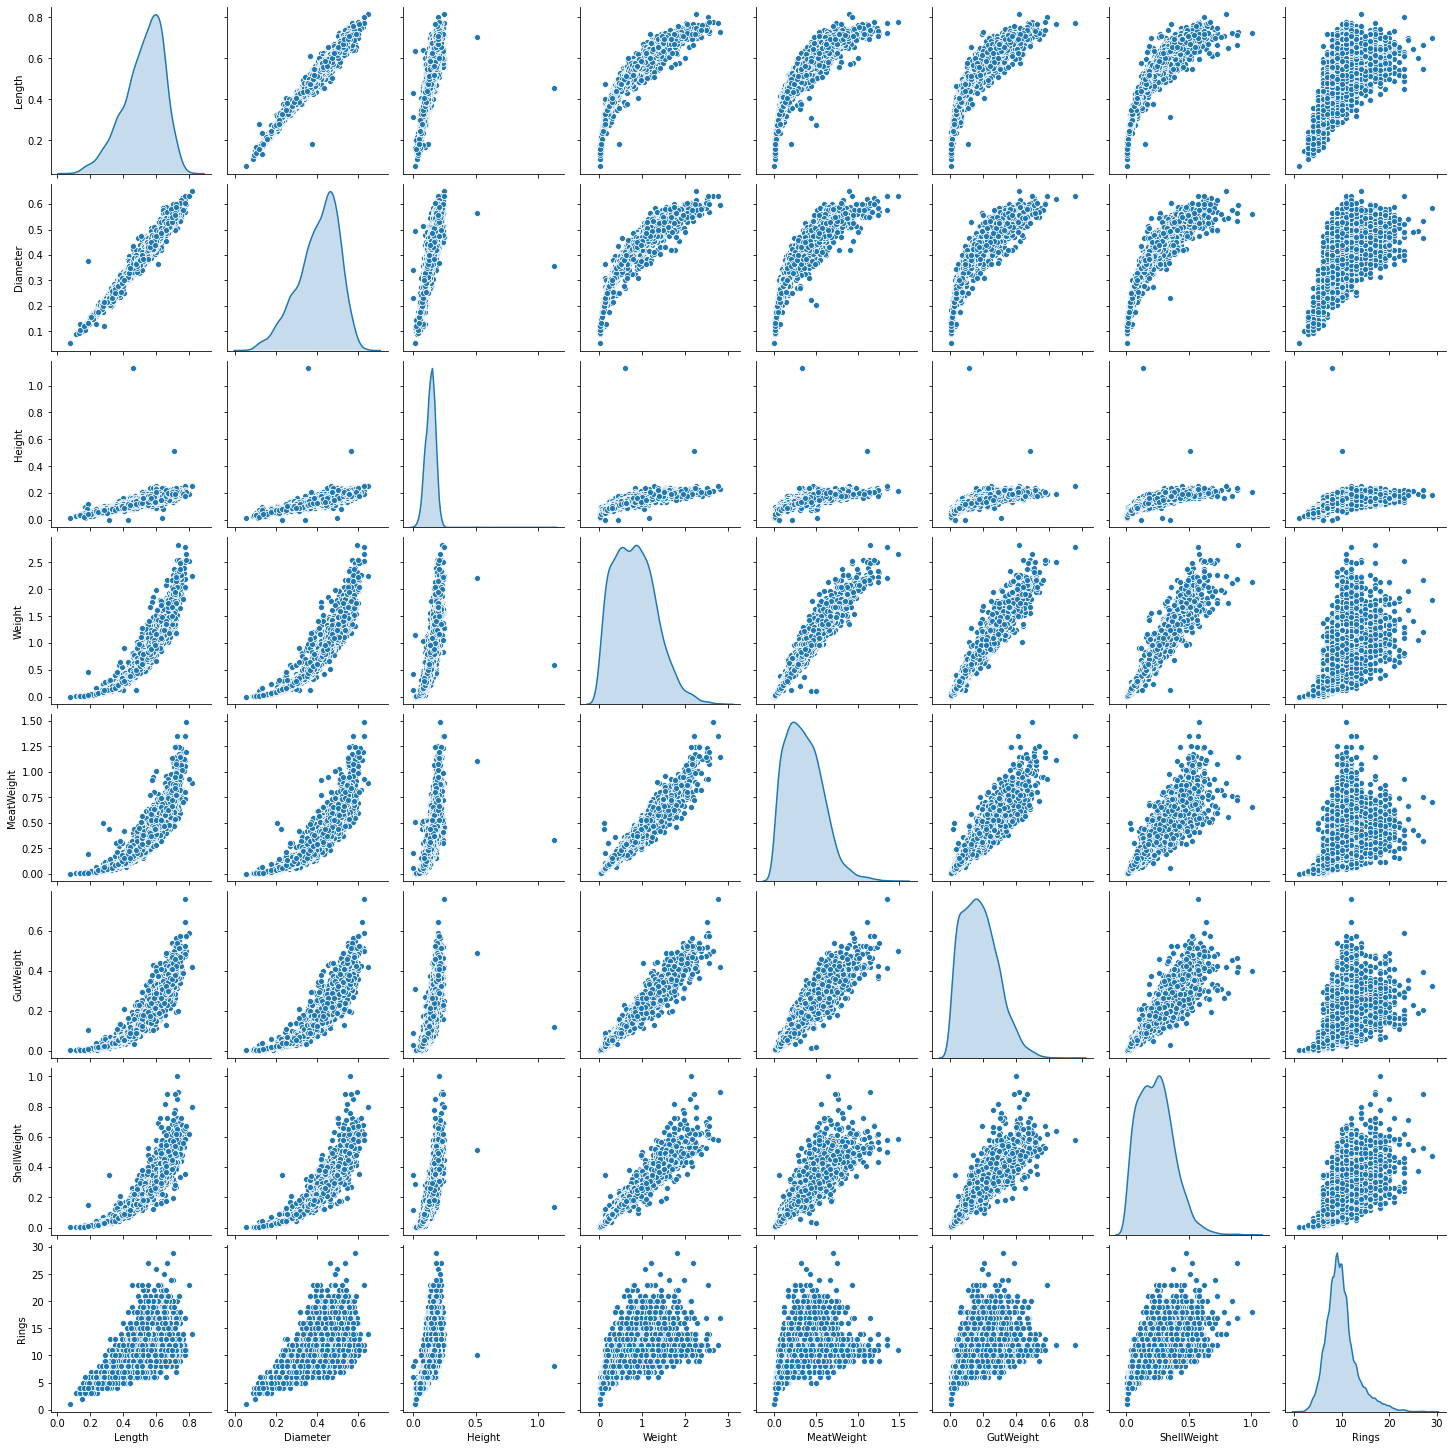

In [15]:
sns.pairplot(df2,diag_kind = 'kde')

In [16]:
from scipy.stats import zscore
df_scaled = df2.apply(zscore)
df_scaled.head()

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


### Elbow Plot

![alt text](https://miro.medium.com/proxy/0*jWe7Ns_ubBpOaemM.png)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

In [0]:
from sklearn.cluster import KMeans

In [0]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
  model = KMeans(num_clusters)
  model.fit(df_scaled)
  cluster_errors.append(model.inertia_)

In [0]:
import matplotlib.pyplot as plt

In [20]:
clusters_df = pd.DataFrame({'clusters':cluster_range,
                            'inertia': cluster_errors})
clusters_df

,clusters,inertia
0,1,33416.000000
1,2,14612.656454
2,3,9926.373960
3,4,7867.991971
4,5,6799.486867
5,6,5837.313922
6,7,5282.090607
7,8,4752.456341
8,9,4289.794345
9,10,3929.173159


Text(0, 0.5, 'Inertia')

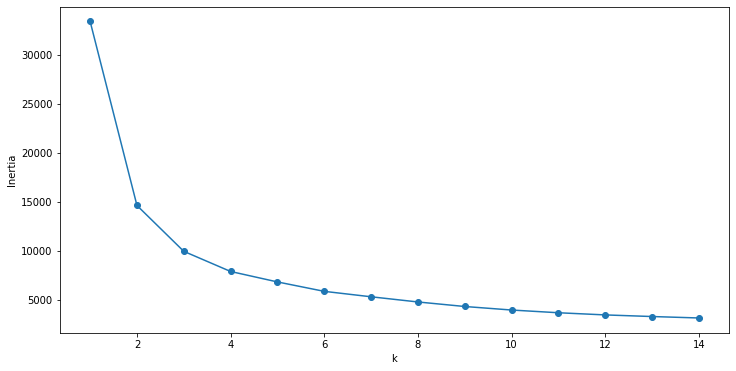

In [21]:
plt.figure(figsize = (12,6))
plt.plot(clusters_df['clusters'],clusters_df['inertia'],marker = 'o')
plt.xlabel('k')
plt.ylabel('Inertia')

As the slope starts becoming constant after k = 3, we will choose value of k as 3 for our kmeans modelling.

In [22]:
kmeans = KMeans(n_clusters = 3,n_init = 15,random_state = 2)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [23]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.0354086 ,  1.04118473,  0.98000079,  1.2200303 ,  1.17656747,
         1.19684326,  1.17495508,  0.61943615],
       [-1.27709975, -1.27787282, -1.12085776, -1.13750326, -1.08408354,
        -1.11591049, -1.1283335 , -0.85717476],
       [ 0.13465134,  0.13117304,  0.06891151, -0.08593864, -0.09146534,
        -0.08428816, -0.060884  ,  0.14258292]])

In [24]:
centroid_df = pd.DataFrame(centroids,columns = list(df_scaled.columns))
centroid_df

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,1.035409,1.041185,0.980001,1.220030,1.176567,1.196843,1.174955,0.619436
1,-1.277100,-1.277873,-1.120858,-1.137503,-1.084084,-1.115910,-1.128333,-0.857175
2,0.134651,0.131173,0.068912,-0.085939,-0.091465,-0.084288,-0.060884,0.142583


In [25]:
df_scaled['labels'] = list(kmeans.labels_)
df_scaled

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings,labels
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,2
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,2
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,2
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765,2
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571,2
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624,0
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571,0


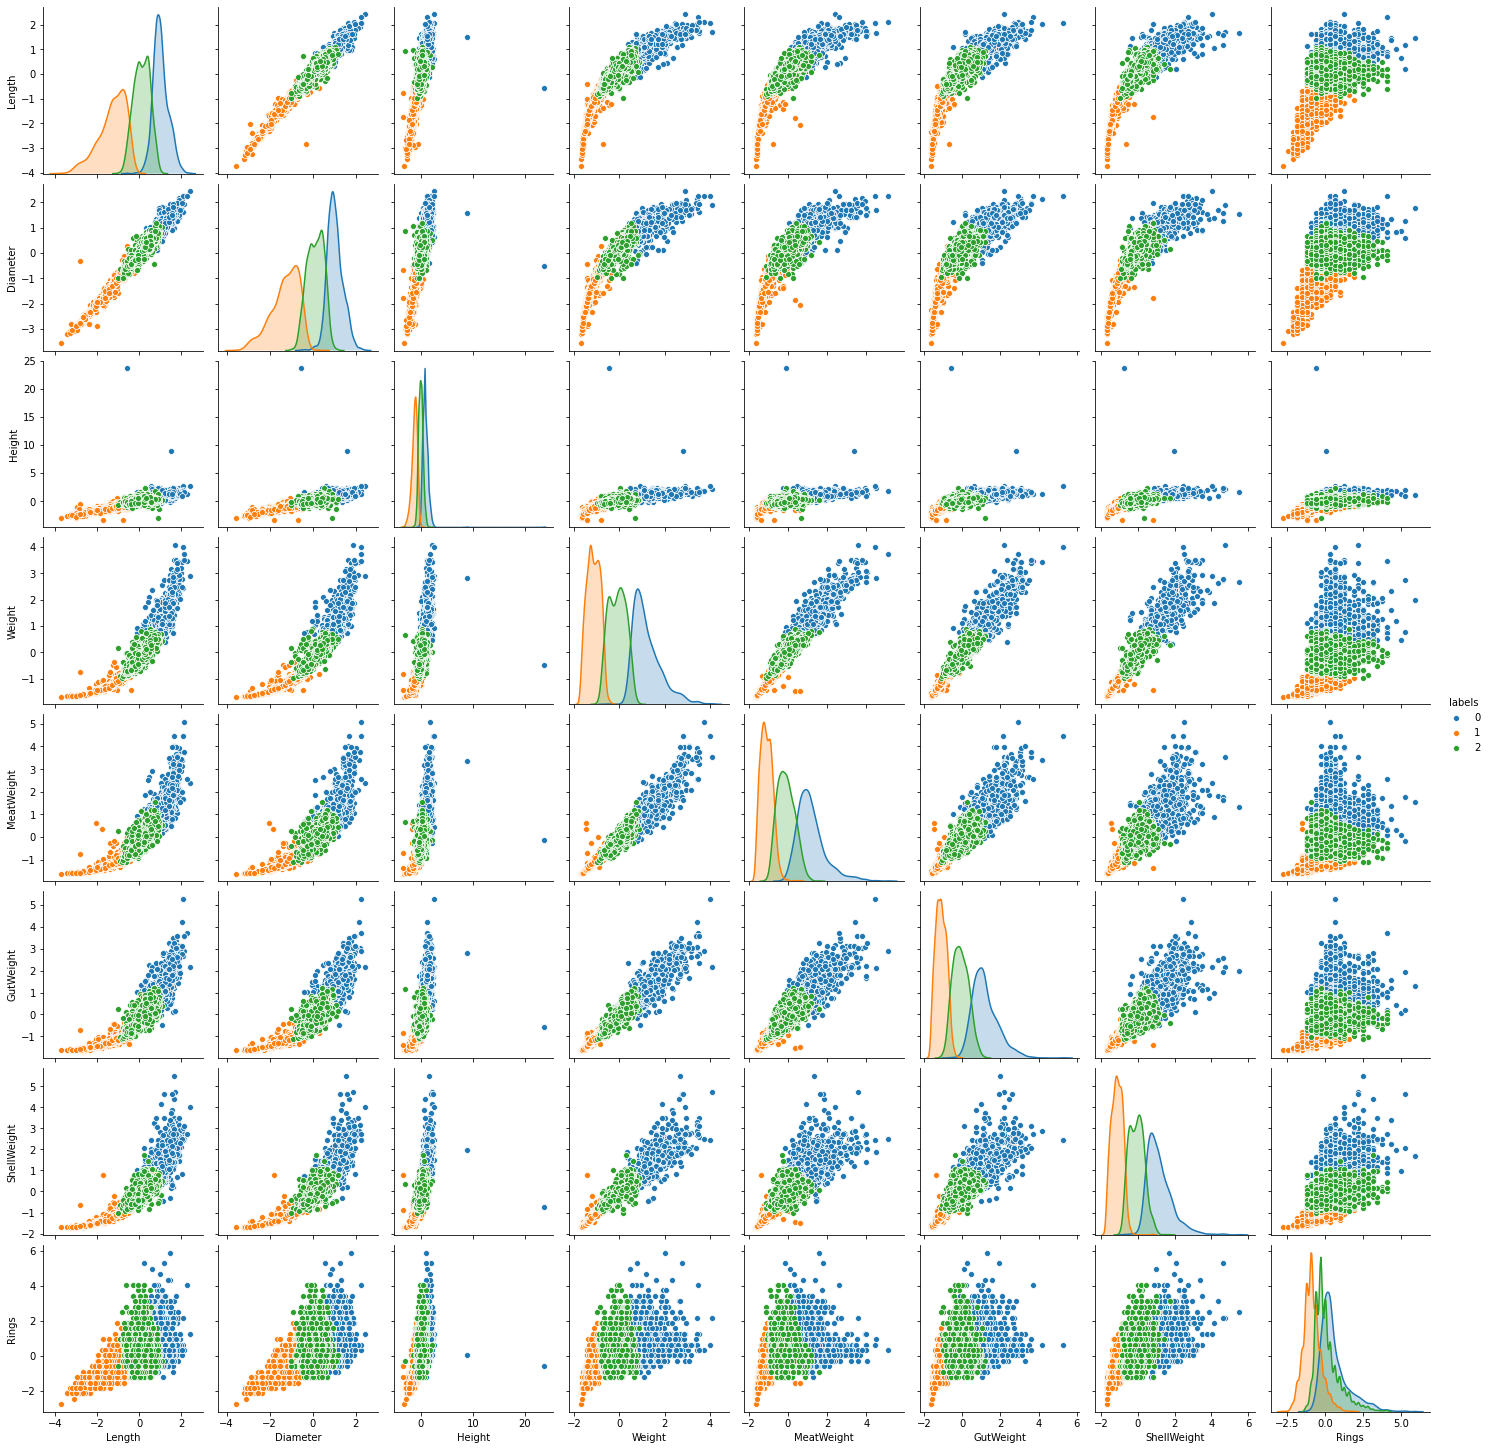

In [26]:
sns.pairplot(df_scaled,hue = 'labels')

Looking at the pairplot above we can see that we have 3 different classes, where class 1 represents INFANT, class 0 represents FEMALES and class 2 represents the MALES.

***Please UpVote if you like the work!!!***